In [182]:
from torchvision import datasets
import numpy as np
from matplotlib import pyplot as plt

(28, 28)


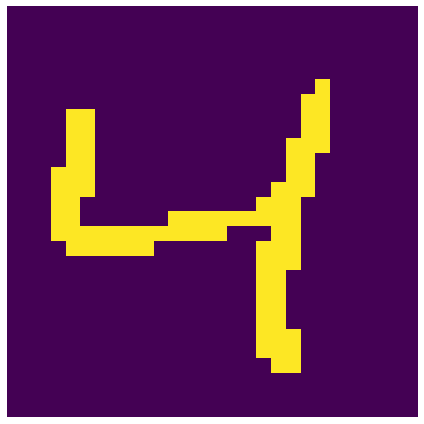

In [183]:
mnist = datasets.MNIST('data', train=True, download=True)

fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 8))

image_pil = mnist[2][0]
image_np = np.asarray(mnist[2][0]) # To undo: im = PIL.Image.fromarray(numpy.uint8(I))

image_np[image_np>100] = 255
image_np[image_np<100] = 0


ax.imshow(image_np)
ax.axis('off')
plt.tight_layout()

print(image_np.shape)

In [184]:
def weights(img):
    channel = 1
    n_row, n_col = img.shape
    
    N = n_row*n_col
    W = np.zeros((N,N))
    
    r = 2
    sigma_I = 0.1
    sigma_X = 1
    
    for row_count, row in enumerate(img):
        for col_count, v in enumerate(row):
            index = row_count * n_col + col_count

            search_w = r * 2 + 1
            start_row = row_count - r
            start_col = col_count - r

            for d_row in range(search_w):
                for d_col in range(search_w):
                    new_row = start_row + d_row
                    new_col = start_col + d_col
                    dst = (new_row - row_count) ** 2 + (new_col - col_count) ** 2
                    if 0 <= new_col < n_col and 0 <= new_row < n_row:
                        if dst >= r ** 2:
                            continue

                        cur_index = int(new_row * n_col + new_col)

                        F = img[row_count, col_count] - img[new_row, new_col]
                        if channel == 3:
                            F_diff = F[0]**2 + F[1]**2 + F[2]**2  
                        else:
                            F_diff = np.abs(F) #**2

                        w = np.exp(-((F_diff / (sigma_I ** 2)) + (dst / (sigma_X ** 2))))
                        W[index, cur_index] = w

    return W

/var/folders/gh/7pvgw1bx4m51xz2gm6y8035c0000gn/T/ipykernel_45239/1456445999.py:31: RuntimeWarning: overflow encountered in ubyte_scalars
  F = img[row_count, col_count] - img[new_row, new_col]


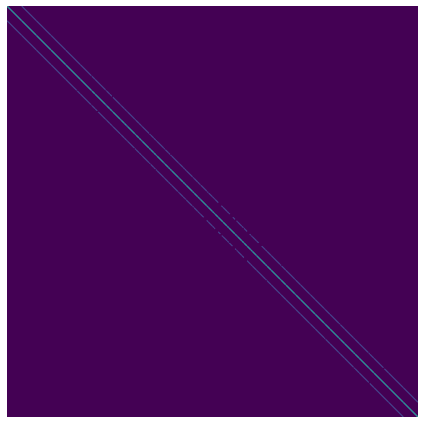

In [185]:
W = weights(image_np)

fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 8))
ax.imshow(W)
ax.axis('off')
plt.tight_layout()

L      - min -0.36787944117144233, max 2.0128588976322206, avg 4.45060250396382e-19
L_symm - min -0.20052592135731548, max 0.6680893350877163, avg 1.472574584352967e-06


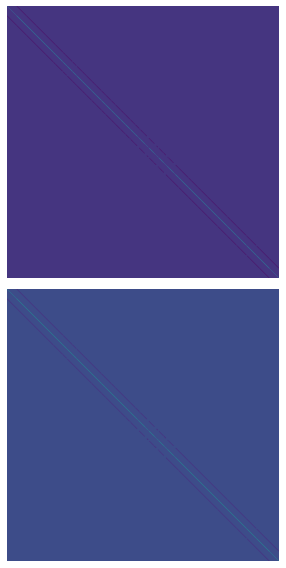

In [186]:
d = np.sum(W, axis=0)
D = np.diagflat(d)

d_sqrt_inv = np.power(np.sqrt(d),-1)
D_sqrt_inv = np.diagflat(d_sqrt_inv)

L = D-W
L_symm = D_sqrt_inv @ (D-W) @ D_sqrt_inv

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))
ax[0].imshow(L)
ax[1].imshow(L_symm)
for a in ax:
    a.axis('off')
plt.tight_layout()

print(f'L      - min {np.min(L)}, max {np.max(L)}, avg {np.average(L)}')
print(f'L_symm - min {np.min(L_symm)}, max {np.max(L_symm)}, avg {np.average(L_symm)}')

In [187]:
from scipy.linalg import eigh

# import sys
# sys.path.append("../")
# from nc import NormalizedCuts

# Node = NormalizedCuts(symm_norm_L=True)

# turns despite requesting the correct order it is wrong :)


# TODO: in general
# Lsymm vs L
# eigs, eigh and a few others probably... also sigma for eigs?
# TODO: for this part
# y = D_inv_sqrt * z
# index = np.argsort(lam)
# smallest = y[:, index[1]] # Does this line make any sense at all??? Or is it wrong..


# Current learnings:
# the order is different every time, despite an option which is 'which' = Smallest real.. (more the method used and not the actual thing..)
# changing parameters of the weights (sigma X and sigma I) can lead to zero convergence with ARPACK
# try LAPACK based solvers??

# lam_l, z_l = linalg.eigsh(L, which='SA')
lam_l, z_l = eigh(L)
index_l = np.argsort(lam_l)
print(lam_l.real)
print(index_l)

print('\n')

# lam_lsymm, z_lsymm = linalg.eigsh(L_symm, which='SA')
lam_lsymm, z_lsymm = eigh(L_symm)
index_lsymm = np.argsort(lam_lsymm)
print(lam_lsymm.real)
print(index_lsymm)

[-6.00698953e-16  7.12278738e-16  1.78254224e-03  2.56699524e-03
  3.22216482e-03  1.19904615e-02  1.24131635e-02  1.44312076e-02
  1.91747349e-02  2.18592085e-02  2.86111386e-02  3.45038950e-02
  3.87782645e-02  4.21847391e-02  4.76777262e-02  5.48131473e-02
  5.54172424e-02  6.38151440e-02  6.90378351e-02  7.70390665e-02
  8.12835143e-02  9.59955402e-02  1.04181133e-01  1.06109077e-01
  1.10219101e-01  1.17210193e-01  1.19676377e-01  1.25926580e-01
  1.29592539e-01  1.34371569e-01  1.37357763e-01  1.58571421e-01
  1.71690141e-01  1.76378159e-01  1.77988822e-01  1.82044939e-01
  1.86244157e-01  1.93775027e-01  1.96162665e-01  1.96310545e-01
  2.03357556e-01  2.15042679e-01  2.29079019e-01  2.29354591e-01
  2.52708353e-01  2.60426894e-01  2.66222649e-01  2.68393402e-01
  2.73636480e-01  2.80112852e-01  2.86761526e-01  2.88169910e-01
  2.94839630e-01  3.03722060e-01  3.09731660e-01  3.25820208e-01
  3.35272746e-01  3.43974491e-01  3.49406644e-01  3.52146240e-01
  3.59644703e-01  3.62237

In [188]:
y_l = D_sqrt_inv @ z_l
y_lsymm = D_sqrt_inv @ z_lsymm

In [189]:
def plot_6(input, index, vals):
    fig, ax = plt.subplots(nrows=6, sharex=True, sharey=True, figsize=(12, 12))

    for i, a in enumerate(ax):
        a.axis('off')
        a.imshow(np.reshape(input[:, i].real, (28,28)))
        a.set_title(f'{index[i]} / {np.min(input[:, i].real)} / {np.max(input[:, i].real)} / val {vals[i].real}')
    plt.tight_layout()

non symmetric


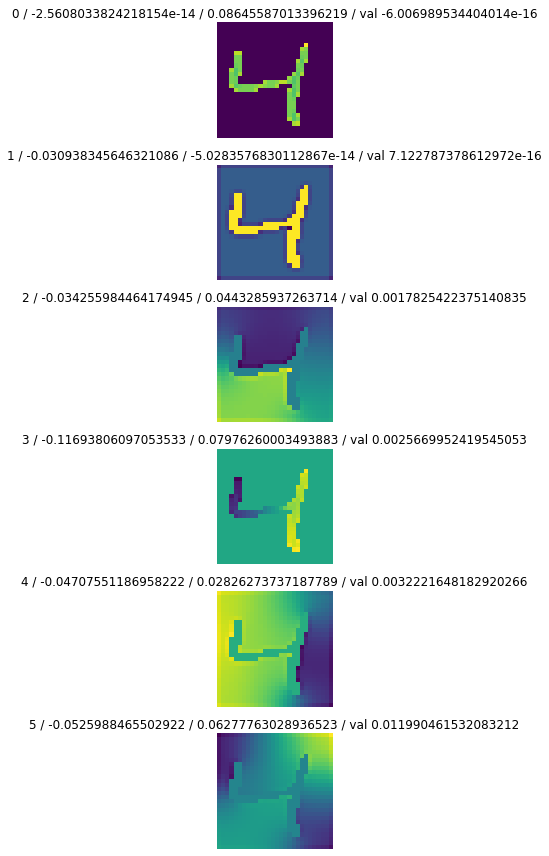

In [190]:
plot_6(y_l, index_l, lam_l)
print('non symmetric')

symmetric


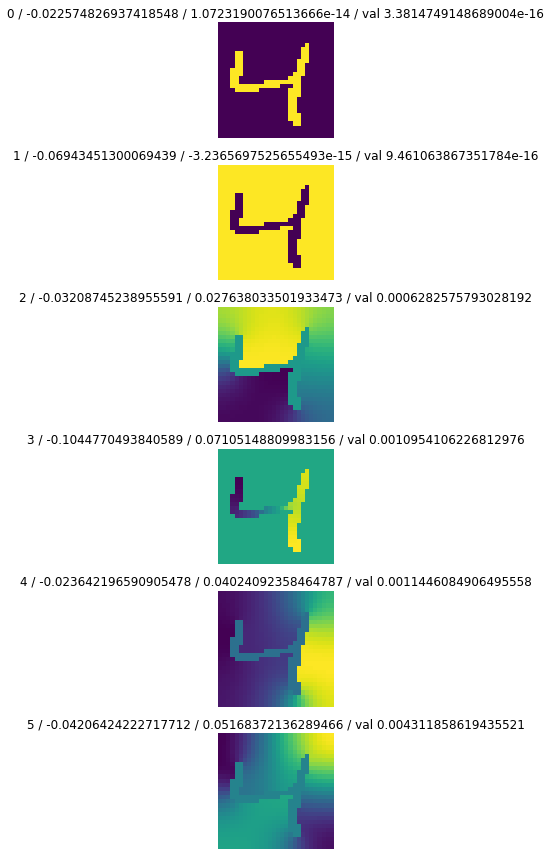

In [191]:
plot_6(y_lsymm, index_lsymm, lam_lsymm)
print('symmetric')

In [192]:
def partition_by_step(input, D, W):
    step = 50
    pos = input.copy()
    max_value = pos.max()
    min_value = pos.min()
    setp = (max_value - min_value) / step
    dict = {}
    for i in range(1, step):
        partition = (min_value + i * setp)
        temp_pos = pos < partition


        k = (np.sum(W[temp_pos])) / (np.sum(D))
        b = k / (1 - k)

        y = temp_pos.astype('float64') * 2 - b * (temp_pos == False).astype('float64') * 2

        ncut = (y @ (D - W) @ y.T) / (y @ D @ y.T)
        dict[i] = ncut

    min_partition = min_value + min(dict, key=dict.get) * setp
    pos[pos >= min_partition] = 255
    pos[pos < min_partition] = 0

    pos = pos.reshape((28, 28))

    return pos.astype('uint8')

In [193]:
def partition_by_zero(input):
    input = input.reshape((28,28)).astype('float64')   
    input[input>0] = 255
    return input.astype('uint8')

In [194]:
def partition_by_avg(input):
    return partition_by_zero(input - np.average(input))

In [195]:
def partition_by_avg_nocut(input):
    return input - np.average(input)

l     / -0.8662736780969904 / -1.4079401512431602e-12
lsymm / -1.944166364019443 / -9.062395307183538e-14


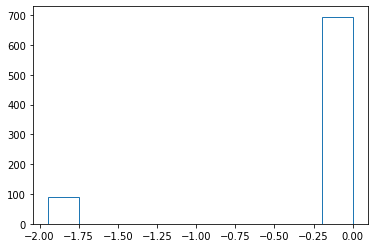

[ 89   0   0   0   0   0   0   0   0 695]
[-1.94416636e+00 -1.74974973e+00 -1.55533309e+00 -1.36091645e+00
 -1.16649982e+00 -9.72083182e-01 -7.77666546e-01 -5.83249909e-01
 -3.88833273e-01 -1.94416636e-01 -9.06239531e-14]


In [207]:
chosen_index = 1

resize_l = y_l[:, chosen_index].real * 28
resize_lsymm = y_lsymm[:, chosen_index].real * 28

print(f'l     / {np.min(resize_l)} / {np.max(resize_l)}')
print(f'lsymm / {np.min(resize_lsymm)} / {np.max(resize_lsymm)}')

# Shows the bins of the outputs for it...
counts, bins = np.histogram(resize_lsymm)
plt.stairs(counts,bins)
plt.show()
print(counts)
print(bins)

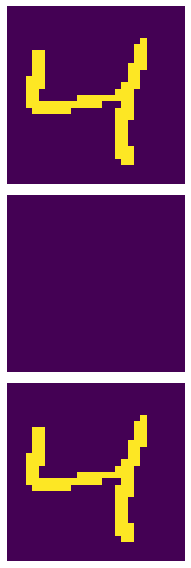

In [197]:

y_l_step = partition_by_step(y_l[:, index_l[chosen_index]], D, W)
y_l_zero = partition_by_zero(y_l[:, index_l[chosen_index]])
y_l_avg = partition_by_avg(y_l[:, index_l[chosen_index]])

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(6, 8))
ax[0].imshow(y_l_step)
ax[1].imshow(y_l_zero)
ax[2].imshow(y_l_avg)
for a in ax:
    a.axis('off')
plt.tight_layout()

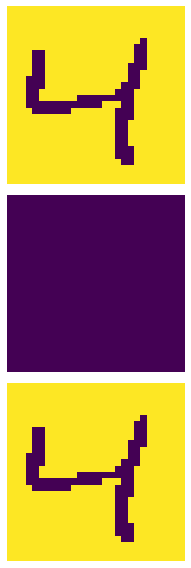

In [198]:
y_lsymm_step = partition_by_step(y_lsymm[:, index_lsymm[chosen_index]], D, W)
y_lsymm_zero = partition_by_zero(y_lsymm[:, index_lsymm[chosen_index]])
y_lsymm_avg = partition_by_avg(y_lsymm[:, index_lsymm[chosen_index]])


fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(6, 8))
ax[0].imshow(y_lsymm_step)
ax[1].imshow(y_lsymm_zero)
ax[2].imshow(y_lsymm_avg)
for a in ax:
    a.axis('off')
plt.tight_layout()

In [199]:
# Take Lsymm and do the lossInterp

In [200]:
# Take Lsymm and do the lossInterp
import torch
import torch.nn as nn

def lech_loss(pred, mask):
    """
    pred is yhat
    mask is y

    _bar is -1,b becoming 0,b
    idealy everything is close to -1,1 actual or 0,1 _bar form

    so instead of classification loss, MSE loss for the application
    """

    # mask should be in format {-1, 1} ideally
    # mask_bar is {0,1} for regression style problem

    mask = mask.reshape((28,28))/255
    pred = pred.reshape((28,28))

    # mask = mask.flatten(-2)#[:,None,:]
    # pred = pred.flatten(-2)#[:,:,None]

    mask_bar = torch.div((mask+1),2) # y_n
    # pred_bar = torch.div((pred+1), 2) # yhat_n convert predicition to {0,1} roughly too
    # goes to 0 if not using above :)
    pred_bar = pred

    relu = nn.ReLU()

    mask_bar = mask_bar.type(pred_bar.dtype)

    loss = torch.matmul((1-mask_bar),(pred_bar+1)**2) + torch.matmul(mask_bar, relu(-pred_bar))
    return torch.mean(loss) # avg across batch I guess

In [201]:
def cut(W):
    d = torch.sum(W, axis=0)
    D = torch.diag_embed(d)

    d_sqrt_inv = d.pow(-1/2)
    D_sqrt_inv = torch.diag_embed(d_sqrt_inv)

    L = D-W
    L_symm = D_sqrt_inv @ (D-W) @ D_sqrt_inv
    
    L_symm = torch.nan_to_num(L_symm, 0, 0, 0)
    
    w,v = eigh(L_symm.numpy())
    index = np.argsort(w)
    output = v[index][0]
    
    return partition_by_avg_nocut(output)
    

/var/folders/gh/7pvgw1bx4m51xz2gm6y8035c0000gn/T/ipykernel_45239/1456445999.py:31: RuntimeWarning: overflow encountered in ubyte_scalars
  F = img[row_count, col_count] - img[new_row, new_col]


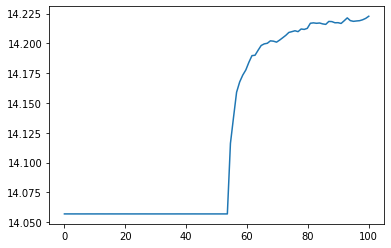

In [202]:
random_count = 3
steps = 100
lerp_weight = 0.05
criterion = lech_loss

W = weights(image_np)

true_img = torch.from_numpy(image_np)/255 - 0.5
true = torch.from_numpy(W)
initial = torch.randn_like(torch.from_numpy(W)) # Random weights, of the correct size
inbetween_weights = initial # Set the initial lerp to the initial random


losses = []
outputs = []
for i in range(0, steps):
    inbetween_weights = torch.lerp(inbetween_weights, true, lerp_weight) # lerp_weight percent steps towards true weights
    output = cut(inbetween_weights)
    loss_1 = criterion(torch.from_numpy(output), true_img)
    losses.append(loss_1)
    outputs.append(output)
    # loss_2 = criterion(output, true_img*-1)
    
x = np.linspace(0, steps, steps)
plt.plot(x, losses)
plt.show()

# losses_2 = []
#     for j in range(random_count):
#         this_losses2 = []
#         true_rand = torch.randn_like(true)
#         inbetween_true = true_rand
#         for i in range(0, steps):
#             # Lerp between random matrix and true (the output)
#             # will always be a perfect curve to 0 if loss works
#             inbetween_true = torch.lerp(inbetween_true, true, lerp_weight)
#             loss = criterion(inbetween_true, true)
#             this_losses2.append(loss.item())
#         losses_2.append(this_losses2)

#     x = np.linspace(0, steps, steps)
#     for j in range(random_count):
#         plt.plot(x,losses_2[j])
#     name = 'experiments/loss-from-lerpoutput.png'
#     plt.savefig(name)
#     print(f'saved {name}')
#     plt.close()

In [203]:
import ipyplot
ipyplot.plot_images(outputs, img_width=28)